
## Library imports

In [2]:
import time
from tqdm import tqdm # Cool progress bar

import numpy as np
import pandas as pd
import tensorflow.keras as ks
import tensorflow as tf

from keras import backend as K
from tensorflow.keras import layers, models, metrics
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
import seaborn as sns

from utilities import *
from utilities import plot_training_history

SEED = 458
RNG = np.random.default_rng(SEED) 


In [9]:
# Import the mnist dataset
datasets = load_mnist(verbose=0)
X_train, y_train = datasets['X_train'], datasets['y_train']
X_val,   y_val   = datasets['X_val'],   datasets['y_val']
X_test,  y_test  = datasets['X_test'],  datasets['y_test']

X_train = np.concatenate([X_train, X_val], axis=0)
y_train = np.concatenate([y_train, y_val], axis=0).astype('int32')

del datasets, X_val, y_val # Good to reduce uneccesary RAM usage


## Task 1.1 Preprocessing

Preprocess the data in whatever way you deem sensible.

In [10]:
# Normalize the pixels to values [0,1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float') / 255.0


# One-hot encoding
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)


## Task 1.1 Visualization

Visualize the data in whatever manner you find helpful/sensible.

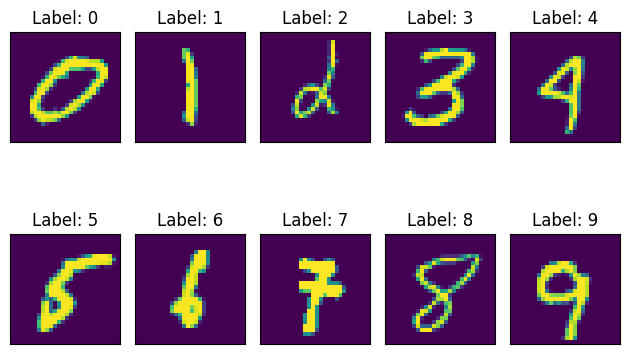

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()

# Iterate through each class (from 0 to 9)
for i in range(10):
    # Find the first sample where the encoded label has a '1' at the i-th position
    img = X_train[np.argmax(y_train_encoded, axis=1) == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='viridis')
    ax[i].set_title(f"Label: {i}")

# Remove x and y ticks for all subplots
for axis in ax:
    axis.set_xticks([])
    axis.set_yticks([])

plt.tight_layout()
plt.show()



In [12]:
# Confirming that our pixels are values [0,1]
print("Min value in X_train:", X_train.min())
print("Max value in X_train:", X_train.max())

unique_labels = np.unique(X_train)
print("Unique labels in y_train:", unique_labels)

Min value in X_train: 0.0
Max value in X_train: 1.0
Unique labels in y_train: [0.         0.00392157 0.00784314 0.01176471 0.01568628 0.01960784
 0.02352941 0.02745098 0.03137255 0.03529412 0.03921569 0.04313726
 0.04705882 0.05098039 0.05490196 0.05882353 0.0627451  0.06666667
 0.07058824 0.07450981 0.07843138 0.08235294 0.08627451 0.09019608
 0.09411765 0.09803922 0.10196079 0.10588235 0.10980392 0.11372549
 0.11764706 0.12156863 0.1254902  0.12941177 0.13333334 0.13725491
 0.14117648 0.14509805 0.14901961 0.15294118 0.15686275 0.16078432
 0.16470589 0.16862746 0.17254902 0.1764706  0.18039216 0.18431373
 0.1882353  0.19215687 0.19607843 0.2        0.20392157 0.20784314
 0.21176471 0.21568628 0.21960784 0.22352941 0.22745098 0.23137255
 0.23529412 0.23921569 0.24313726 0.24705882 0.2509804  0.25490198
 0.25882354 0.2627451  0.26666668 0.27058825 0.27450982 0.2784314
 0.28235295 0.28627452 0.2901961  0.29411766 0.29803923 0.3019608
 0.30588236 0.30980393 0.3137255  0.31764707 0.321568

In [13]:
# Created a f1 metric function with K from keras
def f1_metric(y_true, y_pred):

    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_score = 2*(precision*recall) / (precision+recall+K.epsilon())

    return f1_score



Implement the model, train the model and plot the training history in the code cell(s) below.

In [14]:
# Split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train_encoded, test_size=1/6, random_state=SEED)


# Define the model architecture
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(30, activation='sigmoid'),
    layers.Dense(10, activation='sigmoid')
])


# Compile the model
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy', f1_metric])


# Train the model
history = model.fit(
    X_train_split, y_train_split,
    epochs=5,
    batch_size=10,
    validation_data=(X_val_split, y_val_split))


Epoch 1/5
5000/5000 [==============================] - 25s 4ms/step - loss: 0.0291 - accuracy: 0.8561 - f1_metric: 0.7835 - val_loss: 0.0143 - val_accuracy: 0.9218 - val_f1_metric: 0.9164
Epoch 2/5
5000/5000 [==============================] - 16s 3ms/step - loss: 0.0127 - accuracy: 0.9270 - f1_metric: 0.9222 - val_loss: 0.0111 - val_accuracy: 0.9361 - val_f1_metric: 0.9329
Epoch 3/5
5000/5000 [==============================] - 17s 3ms/step - loss: 0.0103 - accuracy: 0.9409 - f1_metric: 0.9371 - val_loss: 0.0097 - val_accuracy: 0.9408 - val_f1_metric: 0.9402
Epoch 4/5
5000/5000 [==============================] - 18s 4ms/step - loss: 0.0090 - accuracy: 0.9478 - f1_metric: 0.9457 - val_loss: 0.0088 - val_accuracy: 0.9471 - val_f1_metric: 0.9454
Epoch 5/5
5000/5000 [==============================] - 16s 3ms/step - loss: 0.0080 - accuracy: 0.9539 - f1_metric: 0.9516 - val_loss: 0.0083 - val_accuracy: 0.9507 - val_f1_metric: 0.9481


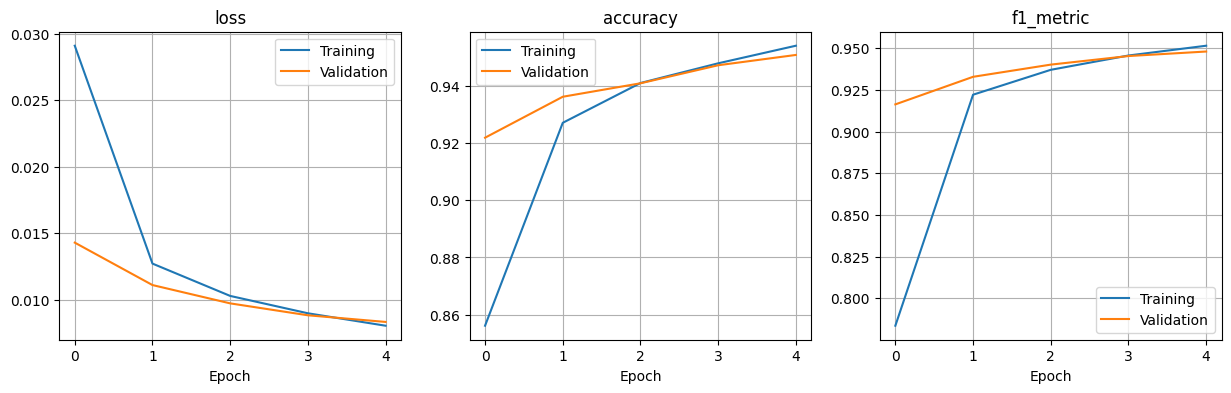

In [15]:
plot_training_history(history)

In [16]:
# Split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train_encoded, test_size=1/6, random_state=SEED)

lr = 0.001

# Define our model architecture
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])


# Compile the model
model.compile(optimizer=Adam(learning_rate=lr),
                loss = 'categorical_crossentropy',
                metrics=['accuracy', f1_metric])


# Train the model
history = model.fit(X_train_split, y_train_split,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_val_split, y_val_split))


Epoch 1/20
1563/1563 [==============================] - 9s 4ms/step - loss: 0.4067 - accuracy: 0.8975 - f1_metric: 0.8564 - val_loss: 0.1700 - val_accuracy: 0.9546 - val_f1_metric: 0.9548
Epoch 2/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.1289 - accuracy: 0.9644 - f1_metric: 0.9645 - val_loss: 0.1198 - val_accuracy: 0.9659 - val_f1_metric: 0.9663
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.0863 - accuracy: 0.9750 - f1_metric: 0.9751 - val_loss: 0.1025 - val_accuracy: 0.9698 - val_f1_metric: 0.9705
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.0645 - accuracy: 0.9810 - f1_metric: 0.9813 - val_loss: 0.0884 - val_accuracy: 0.9725 - val_f1_metric: 0.9730
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0485 - accuracy: 0.9856 - f1_metric: 0.9859 - val_loss: 0.0953 - val_accuracy: 0.9729 - val_f1_metric: 0.9730
Epoch 6/20
1563/1563 [==============================] - 7s 

## Task 3.2: Train your network and visualize the training history



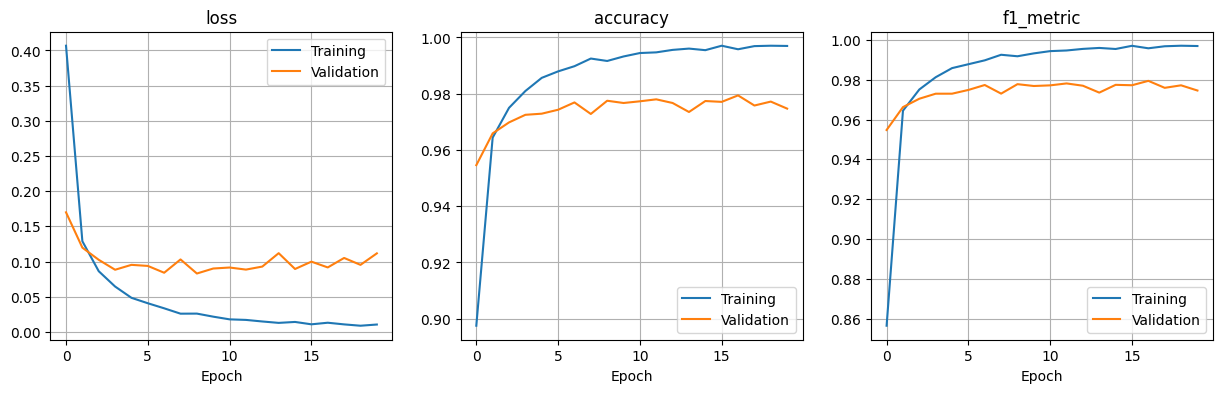

In [17]:
plot_training_history(history)

# Task 4: Design and train a _classical_ machine learning classifier



Accuracy: 96.67%
Macro F1-Score: 0.9665

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       980
         1.0       0.99      0.99      0.99      1135
         2.0       0.95      0.96      0.96      1032
         3.0       0.96      0.96      0.96      1010
         4.0       0.97      0.97      0.97       982
         5.0       0.97      0.96      0.96       892
         6.0       0.98      0.98      0.98       958
         7.0       0.97      0.96      0.96      1028
         8.0       0.96      0.95      0.95       974
         9.0       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



<Figure size 1000x1000 with 0 Axes>

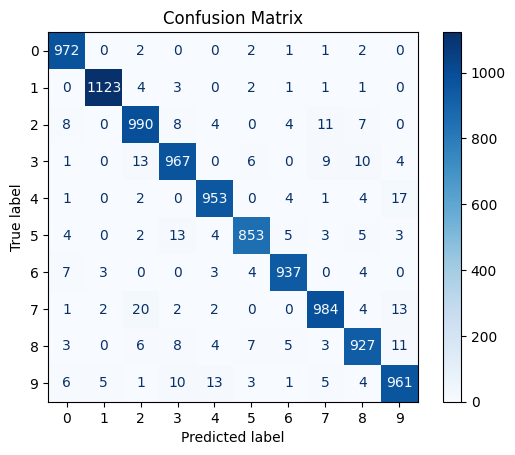

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# Split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=1/6, random_state=SEED)


# Reshape the datasets
X_train_reshaped = X_train_split.reshape(-1, 28 * 28)
X_val_reshaped = X_val_split.reshape(-1, 28 * 28)
X_test_reshaped = X_test.reshape(-1, 28 * 28)


# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)


# Train the model
clf.fit(X_train_reshaped, y_train_split)


# Predict on the test set
y_test_pred = clf.predict(X_test_reshaped)


# Compute metrics
acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred, average='macro')
report = classification_report(y_test, y_test_pred)

print(f"Accuracy: {acc * 100:.2f}%")
print(f"Macro F1-Score: {f1:.4f}")
print("\nClassification Report:")
print(report)


# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 10))
ConfusionMatrixDisplay(cm, display_labels=np.arange(10)).plot(cmap=plt.cm.Blues, values_format="d")
plt.title("Confusion Matrix")
plt.show()
